In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
houses=pd.read_csv("kc_house_data.csv")
houses.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Preparación del data frame

In [3]:
def clean_split_dates(row):
    # Initial date contains the current value for the date column
    initial_date = str(row['date'])

    # Split initial_date into two elements if "T" is found
    split_date = initial_date.split('T') 

    # If a "T"  is found, split_date will contain a list with at least two items
    if len(split_date) > 1:
        final_date = split_date[0]
    # If no "T" is found, split_date will just contain 1 item, the initial_date
    else:
        final_date = initial_date
    
    return final_date

# Assign the results of "clean_split_dates" to the 'date' column. 
# We want Pandas to go row-wise so we set "axis=1".
houses['date'] = houses.apply(lambda row: clean_split_dates(row), axis=1)
houses['date'].head(5)

0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: object

In [4]:
df = pd.DataFrame(houses, columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_basement','sqft_above','grade','yr_built'])
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_basement,sqft_above,grade,yr_built
0,20141013,221900.0,3,1.00,1180,0,1180,7,1955
1,20141209,538000.0,3,2.25,2570,400,2170,7,1951
2,20150225,180000.0,2,1.00,770,0,770,6,1933
3,20141209,604000.0,4,3.00,1960,910,1050,7,1965
4,20150218,510000.0,3,2.00,1680,0,1680,8,1987


In [5]:
dates = df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.drop(['date'], axis=1)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_basement,sqft_above,grade,yr_built,year,month
0,2014-10-13,221900.0,3,1.00,1180,0,1180,7,1955,2014,10
1,2014-12-09,538000.0,3,2.25,2570,400,2170,7,1951,2014,12
2,2015-02-25,180000.0,2,1.00,770,0,770,6,1933,2015,2
3,2014-12-09,604000.0,4,3.00,1960,910,1050,7,1965,2014,12
4,2015-02-18,510000.0,3,2.00,1680,0,1680,8,1987,2015,2


# Representamos gráficamente

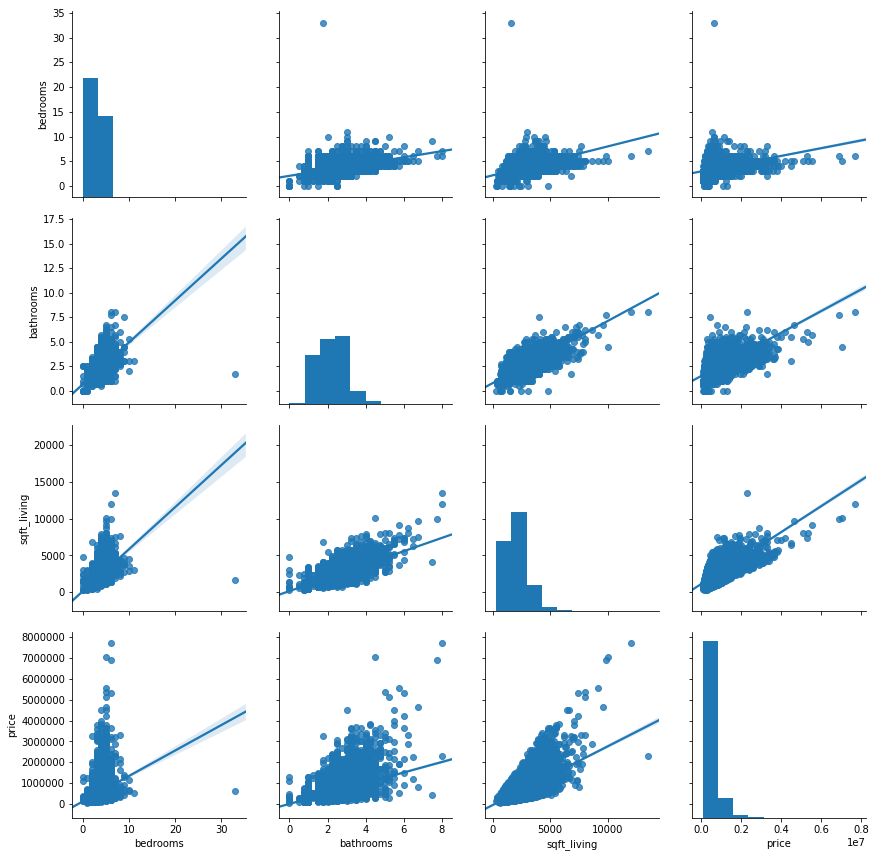

In [6]:
import seaborn as sns 
sns.pairplot(df,size=3,vars=["bedrooms","bathrooms","sqft_living","price"],kind="reg")

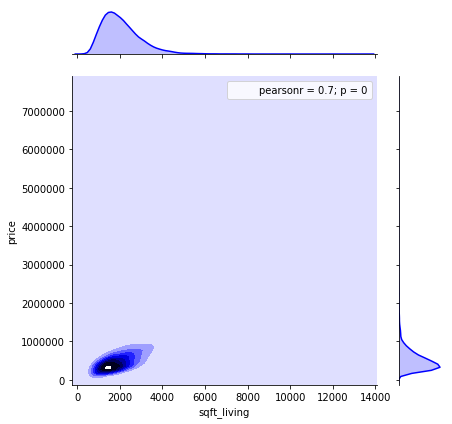

In [7]:
g = sns.jointplot("sqft_living", "price",
                    data=df, kind="kde",space=0.5, color="b")

# Borramos outliers 

In [8]:
print(df.groupby('bedrooms').size())
print(df.groupby('bathrooms').size())

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64
bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
dtype: int64


In [9]:
df = df[df.bedrooms != 33]
df = df[df.bathrooms < 7.5]

# Modelo KNN

In [10]:
from numpy.random import permutation
random_indices = permutation(df.index)
test_cutoff = int(len(df)/3)
test = df.loc[random_indices[1:test_cutoff]]
train = df.loc[random_indices[test_cutoff:]]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X = ['price','bedrooms','bathrooms','sqft_above','sqft_basement']
y = ["grade"]
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(df[X], df[y].values.ravel())
predictions = knn.predict(test[X])
predictions

array([7, 8, 7, ..., 7, 7, 8], dtype=int64)

In [12]:
print('KNN Model Accuracy: {:.4f}'.format(knn.score(test[X], test[y])))

KNN Model Accuracy: 0.6126
